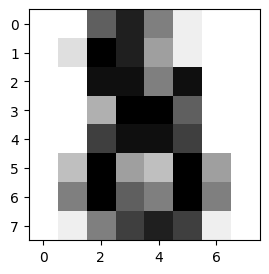

In [42]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Load the digits dataset
digits = datasets.load_digits()
# Display the last digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [43]:
from sklearn.datasets import load_digits

digits = load_digits()


In [44]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [45]:
# Vemos cuantas filas tiene
print(f'data: {digits.data.shape}\ntarget: {digits.target.shape}\nimages: {digits.images.shape}')

data: (1797, 64)
target: (1797,)
images: (1797, 8, 8)


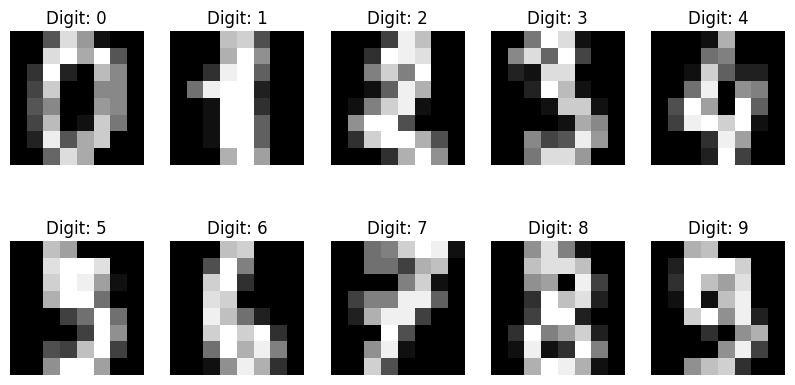

In [46]:
# Visualizar algunas imágenes
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Digit: {label}')
    ax.axis('off')

plt.show()

In [47]:
# Ahora si comparamos images con data, veremos que son iguales
digits.images[10]

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

In [48]:
# Ahora si comparamos images con data, veremos que son iguales
digits.images[10]

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

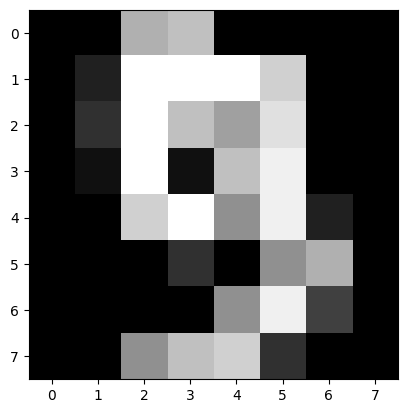

In [49]:
plt.imshow(image,cmap='gray')

In [50]:
digits.target[10]

0

In [51]:
# Ahora dividiremos el data set en dos partes, la primera para el entrenamiento y la segunda para el test
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [52]:
# Entrenamos el modelo de regresión logística
logistic_regresion_model = LogisticRegression(max_iter=10000, solver='lbfgs')
logistic_regresion_model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [53]:
# Haremos las predicciones, esto nos dará como resultado a que digito corresponde cada imagen del test
predictions = logistic_regresion_model.predict(x_test)

In [54]:
# Mediremos la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.97


💡 Conclusion 01: Esto significa que el modelo clasifica correctamente el 97% de las veces

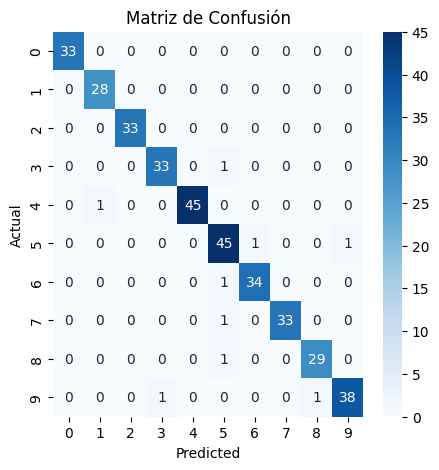

In [55]:
# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

Conclusion 02: Esta métrica nos ayuda a saber la relación que tienen los valores reales con los predichos, por ejemplo si vemos el valor actual 5, tiene 44 valores predecidos correctamente y 3 incorrectas. en general vemos que la mayoría de valores han sido correctamente predichas.

In [56]:
# Mostrar el informe de clasificación
class_report = classification_report(y_test, predictions)
print('Informe de Clasificación:')
print(class_report)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



In [57]:
#clase 0
TP=33
FP=0
FN=0
Precisión = TP / (TP + FP)
RECALL= TP / (TP + FN)
f1 = 2 * Precisión * RECALL / (Precisión + RECALL)
print("Precision:",Precisión)
print("Recall :",RECALL)
print("F1- SCORE :",f1)

Precision: 1.0
Recall : 1.0
F1- SCORE : 1.0


In [58]:
#clase 1
TP=28
FP=1
FN=0
Precisión = TP / (TP + FP)
RECALL= TP / (TP + FN)
f1 = 2 * Precisión * RECALL / (Precisión + RECALL)
print("Precision:",Precisión)
print("Recall :",RECALL)
print("F1- SCORE :",f1)

Precision: 0.9655172413793104
Recall : 1.0
F1- SCORE : 0.9824561403508771


In [59]:
#clase 2
TP=33
FP=0
FN=0
Precisión = TP / (TP + FP)
RECALL= TP / (TP + FN)
f1 = 2 * Precisión * RECALL / (Precisión + RECALL)
print("Precision:",Precisión)
print("Recall :",RECALL)
print("F1- SCORE :",f1)

Precision: 1.0
Recall : 1.0
F1- SCORE : 1.0


In [60]:
#clase 3
TP=33
FP=1
FN=1
Precisión = TP / (TP + FP)
RECALL= TP / (TP + FN)
f1 = 2 * Precisión * RECALL / (Precisión + RECALL)
print("Precision:",Precisión)
print("Recall :",RECALL)
print("F1- SCORE :",f1)

Precision: 0.9705882352941176
Recall : 0.9705882352941176
F1- SCORE : 0.9705882352941176


In [61]:
#clase 4
TP=45
FP=0
FN=1
Precisión = TP / (TP + FP)
RECALL= TP / (TP + FN)
f1 = 2 * Precisión * RECALL / (Precisión + RECALL)
print("Precision:",Precisión)
print("Recall :",RECALL)
print("F1- SCORE :",f1)

Precision: 1.0
Recall : 0.9782608695652174
F1- SCORE : 0.989010989010989


In [62]:
#clase 5
TP=45
FP=4
FN=2
Precisión = TP / (TP + FP)
RECALL= TP / (TP + FN)
f1 = 2 * Precisión * RECALL / (Precisión + RECALL)
print("Precision:",Precisión)
print("Recall :",RECALL)
print("F1- SCORE :",f1)

Precision: 0.9183673469387755
Recall : 0.9574468085106383
F1- SCORE : 0.9375000000000001


In [63]:
#clase 6
TP=34
FP=1
FN=1
Precisión = TP / (TP + FP)
RECALL= TP / (TP + FN)
f1 = 2 * Precisión * RECALL / (Precisión + RECALL)
print("Precision:",Precisión)
print("Recall :",RECALL)
print("F1- SCORE :",f1)

Precision: 0.9714285714285714
Recall : 0.9714285714285714
F1- SCORE : 0.9714285714285714


In [64]:
#clase 7
TP=33
FP=0
FN=1
Precisión = TP / (TP + FP)
RECALL= TP / (TP + FN)
f1 = 2 * Precisión * RECALL / (Precisión + RECALL)
print("Precision:",Precisión)
print("Recall :",RECALL)
print("F1- SCORE :",f1)

Precision: 1.0
Recall : 0.9705882352941176
F1- SCORE : 0.9850746268656716


In [65]:
#clase 8
TP=29
FP=1
FN=1
Precisión = TP / (TP + FP)
RECALL= TP / (TP + FN)
f1 = 2 * Precisión * RECALL / (Precisión + RECALL)
print("Precision:",Precisión)
print("Recall :",RECALL)
print("F1- SCORE :",f1)

Precision: 0.9666666666666667
Recall : 0.9666666666666667
F1- SCORE : 0.9666666666666667


In [66]:
#clase 9
TP=38
FP=1
FN=2
Precisión = TP / (TP + FP)
RECALL= TP / (TP + FN)
f1 = 2 * Precisión * RECALL / (Precisión + RECALL)
print("Precision:",Precisión)
print("Recall :",RECALL)
print("F1- SCORE :",f1)

Precision: 0.9743589743589743
Recall : 0.95
F1- SCORE : 0.9620253164556962


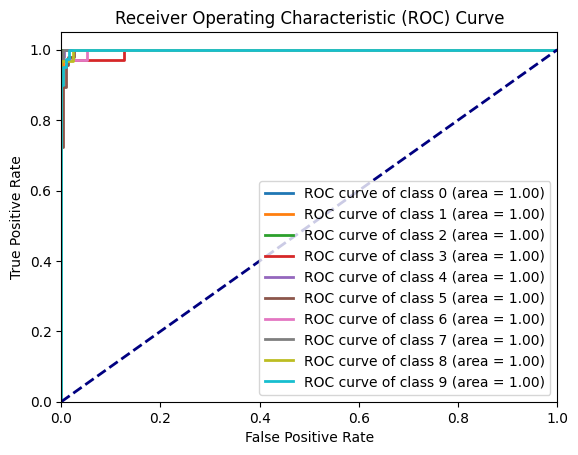

In [67]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
# Obtener las probabilidades predichas para todas las clases
y_probs = logistic_regresion_model.predict_proba(x_test)

# Binarizar las etiquetas para la curva ROC multiclase
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_test_bin.shape[1]

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para cada clase
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

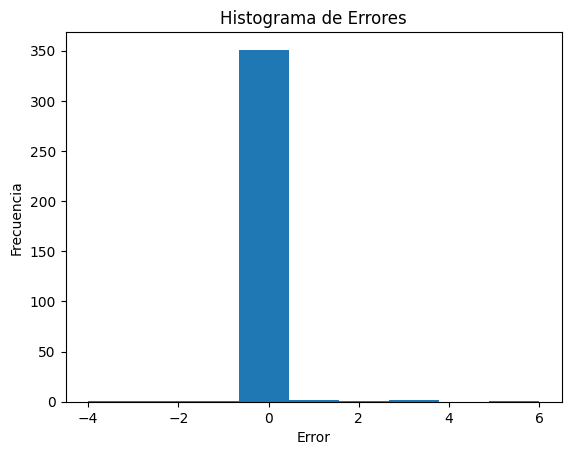

In [68]:
# Calcular los errores
errors = y_test - predictions  # Resta las predicciones de los valores reales

# Crear el histograma
plt.hist(errors, bins=9)  # Ajusta el número de bins según sea necesario
plt.title('Histograma de Errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

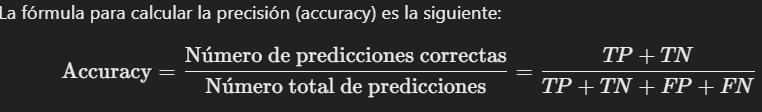

In [69]:
# Soportes de cada clase
support = [33, 28, 33, 34, 46, 47, 35, 34, 30, 40]

# Calcular TP Total y Support Total
TP_total = sum(support)
total_instances = TP_total  # Asumiendo que TP = Support en este caso

# Calcular Accuracy
accuracy = TP_total / total_instances
print("ACCURACY:", accuracy)

ACCURACY: 1.0


In [70]:
# Calcular la precisión
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97
